## Explore Differential Privacy

### Introduction

Sometimes some aggregated analysis can reveal some personal data which isn't so good. With large volumes of data, the aggregations provide a level of abstraction; but with smaller amounts of data, or with repeated analyses, even aggregated results may reveal details about individual observations. In order to avoid this, analysis are modified a little bit adding some noise.
**Differential privacy** is a technique that can help protect an individual's data against this kind of exposure adding some noise to data in order to compute aggregated analysis which follow its original distribution but isn't deterministic.

One way that an individual can protect their personal data is to not partecipate in a study. however, it can happen that the results can affect you anyway and sometimes it can bring some advantages.
To take into account the likelihood of being discovered within the aggregated data, the parameter $\epsilon$ quantifies that risk: the higher $\epsilon$ is, the higher is the probability of being discovered in aggregated data but the accuracy of the stufy will be higher due to the small amount of noise introduced within aggregated data.


In [1]:
#!pip install opendp-smartnoise==0.1.4.2

     -------------------------------------- 193.8/193.8 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 112.4/112.4 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 9.1/9.1 MB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 12.7/12.7 MB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 4.4 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 191.1/191.1 kB 3.8 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141210 sha256=143b18a5f0dec97e8a1b9e49a2aaed64ac32d1f98e70d2ac4232895a257e37d2
  Stored in directory: c:\users\ravazzil\appdata\local\pip\

In [2]:
import pandas as pd

data = pd.read_csv('Script/data/diabetes.csv')
data.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.000000e+04,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.502122e+06,3.25580,107.850200,71.207500,28.81760,139.243600,31.567022,0.400944,30.134100,0.334400
std,2.892868e+05,3.40572,31.920909,16.801478,14.50648,133.777919,9.804366,0.381463,12.106047,0.471804
min,1.000038e+06,0.00000,44.000000,24.000000,7.00000,14.000000,18.200807,0.078044,21.000000,0.000000
25%,1.251672e+06,0.00000,84.000000,58.000000,15.00000,39.000000,21.247427,0.137065,22.000000,0.000000
50%,1.504394e+06,2.00000,105.000000,72.000000,31.00000,85.000000,31.922421,0.199698,24.000000,0.000000
75%,1.754608e+06,6.00000,129.000000,85.000000,41.00000,197.000000,39.328921,0.621158,35.000000,1.000000
max,1.999997e+06,14.00000,192.000000,117.000000,92.00000,796.000000,56.034628,2.301594,77.000000,1.000000


**SmartNoise** uses some parameters to define the differential privacy procedure:
- Upper and Lower bound to retain the distribution of raw data.
- Sample size, namely the number of points generated by the SmartNoise.
- $\epsilon$ managed the amount of noise added to data.

The implemented methodology to change data is quite complex.

### SmartNoise for mean

In [8]:
import opendp.smartnoise.core as sn

cols = list(data.columns)
age_range = [0.0, 120.0]
samples = data.shape[0]

with sn.Analysis() as analysis:
    data = sn.Dataset(path = 'Script/data/diabetes.csv', column_names=cols)
    age_dt = sn.to_float(data['Age'])
    # get mean of age
    age_mean = sn.dp_mean(data = age_dt,
                          privacy_usage={'epsilon': .50},
                          data_lower = age_range[0],
                          data_upper = age_range[1],
                          data_rows = samples)

analysis.release()

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [ ]:
# Print differentially private estimate of mean age.
print("Private mean age:",age_mean.value)

# print actual mean age
print("Actual mean age:", data.Age.mean())

### SmartNoise for distributions

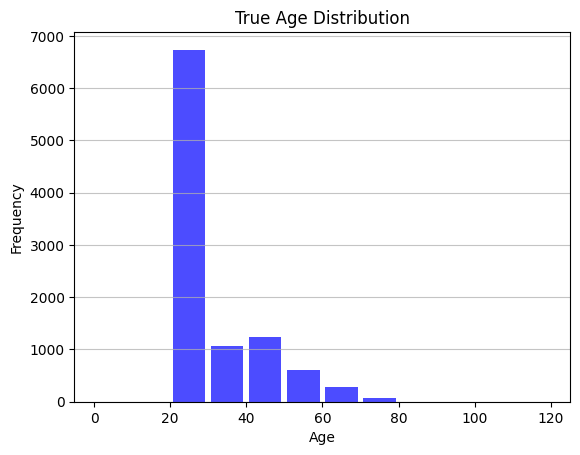

In [12]:
# Show data distribution histogram.

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

ages = list(range(0, 130, 10))
age = data.Age

# Plot a histogram with 10-year bins
n_age, bins, patches = plt.hist(age, bins=ages, color='blue', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('True Age Distribution')
plt.show();

In [ ]:
import matplotlib.pyplot as plt

with sn.Analysis() as analysis:
    data = sn.Dataset(path = 'Script/data/diabetes.csv', column_names = cols)

    age_histogram = sn.dp_histogram(
            sn.to_int(data['Age'], lower=0, upper=120),
            edges = ages,
            upper = 10000,
            null_value = -1,
            privacy_usage = {'epsilon': 0.5}
        )

analysis.release()

plt.ylim([0,7000])
width=4
agecat_left = [x + width for x in ages]
agecat_right = [x + 2*width for x in ages]
plt.bar(list(range(0,120,10)), n_age, width=width, color='blue', alpha=0.7, label='True')
plt.bar(agecat_left, age_histogram.value, width=width, color='orange', alpha=0.7, label='Private')
plt.legend()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

print(age_histogram.value)

### SmartNoise for correlation

In [ ]:
with sn.Analysis() as analysis:
    sn_data = sn.Dataset(path = data_path, column_names = cols)

    age_bp_cov_scalar = sn.dp_covariance(
                left = sn.to_float(sn_data['Age']),
                right = sn.to_float(sn_data['DiastolicBloodPressure']),
                privacy_usage = {'epsilon': 1.0},
                left_lower = 0.,
                left_upper = 120.,
                left_rows = 10000,
                right_lower = 0.,
                right_upper = 150.,
                right_rows = 10000)
analysis.release()
print('Differentially private covariance: {0}'.format(age_bp_cov_scalar.value[0][0]))
print('Actual covariance', diabetes.Age.cov(diabetes.DiastolicBloodPressure))

### SQL SmartNoise

You can retrieve data from the source with SmartNoise applying differential privacy.

In [ ]:
# Metadata of table.
from opendp.smartnoise.metadata import CollectionMetadata

meta = CollectionMetadata.from_file('metadata/diabetes.yml')
print (meta)

In [14]:
from opendp.smartnoise.sql import PandasReader, PrivateReader

# Read raw data.
reader = PandasReader(data, meta)
# Original query.
query = 'SELECT Diabetic, AVG(Age) AS AvgAge FROM diabetes.diabetes GROUP BY Diabetic'

result = reader.execute(query)
print(result)

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [13]:
# Apply differential privacy to reader.
private_reader = PrivateReader(reader=reader, metadata=meta, epsilon_per_column=0.7)
print('Readers ready.')

result_dp = private_reader.execute(query)
print(result_dp)

NameError: name 'private_reader' is not defined

In [ ]:
# Let's play a little bit woth epsilon.

# More noise -> more privacy -> less accuracy
low_privacy_reader = PrivateReader(reader, meta, 5.0)  # large epsilon, less privacy
result = low_privacy_reader.execute(query)
print(result)

# Less noise -> less privacy -> more accuracy
high_privacy_reader = PrivateReader(reader, meta, 0.1)  # smaller epsilon, more privacy
result = high_privacy_reader.execute(query)
print(result)